<a href="https://colab.research.google.com/github/VictorThrive/AgricConnect-PHL/blob/master/Python/Food_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
df_foodp=pd.read_excel('https://github.com/VictorThrive/AgricConnect-PHL/raw/master/dataset/other_datasets/food_price.xlsx')


df_foodp.head()

,date,State,town,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price(NGN),price(USD),year
0,1/15/2019,Borno,Biu,Biu,1968,10.61,12.19,cereals and tubers,Bread,55,Unit,actual,Retail,NGN,162.00,0.53,2019
1,1/15/2019,Borno,Biu,Biu,1968,10.61,12.19,cereals and tubers,"Cassava meal (gari, yellow)",482,100 KG,actual,Wholesale,NGN,11512.00,37.52,2019
2,1/15/2019,Borno,Biu,Biu,1968,10.61,12.19,cereals and tubers,"Cassava meal (gari, yellow)",482,KG,actual,Retail,NGN,318.07,1.04,2019
3,1/15/2019,Borno,Biu,Biu,1968,10.61,12.19,cereals and tubers,Gari (white),483,100 KG,actual,Wholesale,NGN,11084.00,36.13,2019
4,1/15/2019,Borno,Biu,Biu,1968,10.61,12.19,cereals and tubers,Gari (white),483,KG,actual,Retail,NGN,240.53,0.78,2019


In [6]:
df_foodp.shape

(29953, 17)

In [7]:
df_foodp.isnull().sum().sort_values(ascending=False)

,0
date,0
State,0
town,0
market,0
market_id,0
latitude,0
longitude,0
category,0
commodity,0
commodity_id,0


In [9]:
# Convert 'date' column to datetime
df_foodp['date'] = pd.to_datetime(df_foodp['date'], errors='coerce')

# Drop rows with missing prices or commodities
df_foodp = df_foodp.dropna(subset=['price(NGN)', 'commodity'])

# Optional: remove price outliers (based on z-score or IQR method)
q1 = df_foodp['price(NGN)'].quantile(0.25)
q3 = df_foodp['price(NGN)'].quantile(0.75)
iqr = q3 - q1
df_foodp = df_foodp[(df_foodp['price(NGN)'] >= q1 - 1.5 * iqr) & (df_foodp['price(NGN)'] <= q3 + 1.5 * iqr)]


In [12]:
# Extract month and year
df_foodp['month'] = df_foodp['date'].dt.to_period('M')

# Group by commodity and month
monthly_avg = df_foodp.groupby(['commodity', 'month'])['price(NGN)'].mean().reset_index()

# Convert month to datetime
monthly_avg['month'] = monthly_avg['month'].dt.to_timestamp()





In [13]:
# Identifying the top commodity
top_commodity = monthly_avg['commodity'].value_counts().index[0]
filtered = monthly_avg[monthly_avg['commodity'] == top_commodity]

top_commodity,filtered

('Bananas',
    commodity      month  price(NGN)
 0    Bananas 2019-01-01  203.684211
 1    Bananas 2019-02-01  205.910526
 2    Bananas 2019-03-01  206.284211
 3    Bananas 2019-04-01  154.627778
 4    Bananas 2019-05-01  137.631579
 5    Bananas 2019-06-01  139.736842
 6    Bananas 2019-07-01  224.473684
 7    Bananas 2019-08-01  182.380000
 8    Bananas 2019-09-01  125.555556
 9    Bananas 2019-10-01  209.973684
 10   Bananas 2019-11-01  127.810526
 11   Bananas 2019-12-01  138.181818
 12   Bananas 2020-01-01  198.115789
 13   Bananas 2020-02-01  183.247368
 14   Bananas 2020-03-01  225.000000
 15   Bananas 2020-04-01  242.812500
 16   Bananas 2020-05-01  203.721053
 17   Bananas 2020-06-01  208.684211
 18   Bananas 2020-07-01  267.333333
 19   Bananas 2020-08-01  202.547895
 20   Bananas 2020-09-01  192.705789
 21   Bananas 2020-10-01  210.000000
 22   Bananas 2020-11-01  197.157895
 23   Bananas 2020-12-01  196.894737
 24   Bananas 2021-01-01  200.842105
 25   Bananas 2021-02-01  

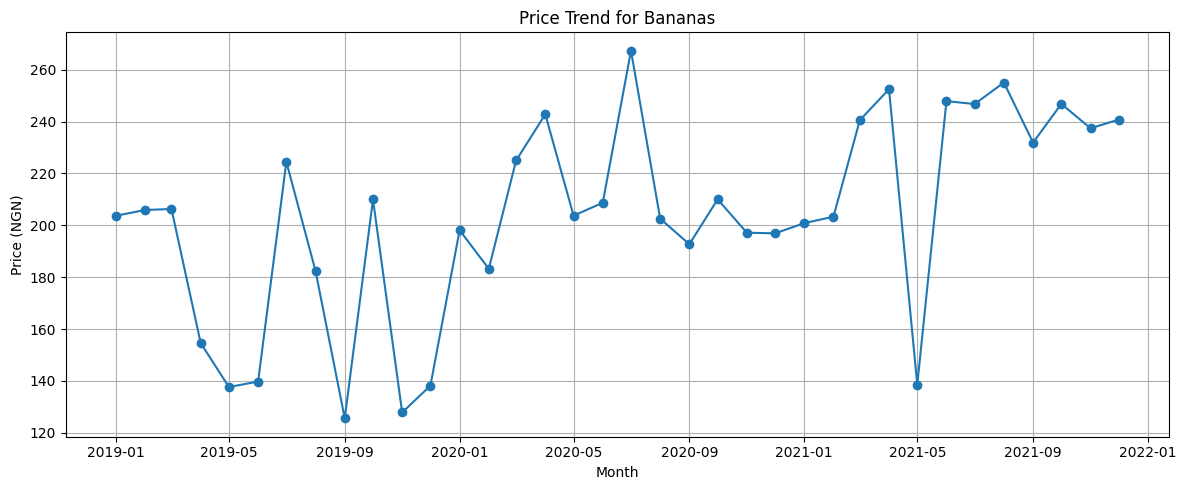

In [14]:
#Plotting the trend of the top commodity
plt.figure(figsize=(12, 5))
plt.plot(filtered['month'], filtered['price(NGN)'], marker='o')
plt.title(f'Price Trend for {top_commodity}')
plt.xlabel('Month')
plt.ylabel('Price (NGN)')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Price Volatility (by Commodity)**

In [15]:
price_volatility = df_foodp.groupby('commodity')['price(NGN)'].std().reset_index()


price_volatility

,commodity,price(NGN)
0,Bananas,92.055748
1,Beans (red),211.882305
2,Beans (white),193.364390
3,Bread,141.564561
4,"Cassava meal (gari, yellow)",109.093353
5,Cowpeas,107.390285
6,Cowpeas (brown),192.991127
7,Cowpeas (white),163.904293
8,Eggs,235.732608
9,Fish,347.174546


In [16]:
price_volatility.columns = ['commodity', 'price_volatility']
price_volatility = price_volatility.sort_values(by='price_volatility', ascending=False)


(price_volatility.head(10))

,commodity,price_volatility
9,Fish,347.174546
36,Yam,305.721578
18,Meat (beef),266.538402
19,Meat (goat),239.176820
8,Eggs,235.732608
1,Beans (red),211.882305
2,Beans (white),193.364390
6,Cowpeas (brown),192.991127
26,Rice (imported),183.728342
25,Oranges,178.498179
